In [2]:
from matplotlib import pyplot as plt

In [3]:
import os
import tqdm
import pathlib
import numpy as np
import pandas as pd

tqdm.tqdm.pandas()
pd.set_option('display.max_columns', None)

In [4]:
DATA_DIR = pathlib.Path("./data/")
RS = 3984765

In [5]:
train = pd.read_parquet(DATA_DIR.joinpath("train.parquet"))
index_split = int(train.shape[0] * 0.8)
test = train[index_split:]
train = test[:index_split]

train["feature4"] = (train["feature4"] == "gas1") * 1
train.head()

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,feature24,target0,target1
122733,39.503470,31.506052,48.972173,-25.842983,0,72.627847,-2.191406,70.750813,-44.124381,-18.069708,38.561548,-10.995420,57.835217,84.063141,166.094203,-13.175178,117.062021,-14.439375,17.691841,91.879529,-9.677797,-16.060150,38.113659,61.118261,12.887802,75.861541,41.338863
122734,39.462554,34.701031,47.997330,-25.844845,0,23.849123,14.785413,50.684590,60.209152,-25.260806,27.535895,7.390587,60.101252,89.312514,125.934464,-13.174172,95.075919,-14.442878,5.954506,93.280293,-9.757072,-16.060150,37.370840,61.197294,105.700376,75.834861,49.667365
122735,31.705297,17.376350,94.790783,3.054071,1,20.487150,34.704883,49.245392,-44.124381,20.439558,-28.642094,-10.995420,40.863345,16.553172,72.834262,19.044595,63.245646,14.518873,9.877149,17.951955,16.307025,102.176975,92.755240,56.956705,12.887802,18.906984,2.775643
122736,17.196257,17.376350,69.652269,2.903164,1,20.487150,34.911335,49.245392,-44.124381,11.031726,-28.640770,-10.995420,40.850454,43.405551,85.776369,18.567057,74.069243,14.262270,9.759794,17.951993,24.118836,102.567544,119.429526,48.219687,12.887802,32.582585,7.261730
122737,8.714861,56.198880,48.108446,-25.822133,0,40.756018,0.626815,60.097854,-44.124381,-25.269732,38.472161,7.336158,87.221281,89.540089,114.266606,-13.017349,72.613716,-14.321618,25.446808,91.026398,-22.782651,-16.060150,37.716016,43.845391,12.887802,79.053707,42.514827


array([[<Axes: xlabel='feature0', ylabel='feature0'>,
        <Axes: xlabel='feature1', ylabel='feature0'>,
        <Axes: xlabel='feature2', ylabel='feature0'>,
        <Axes: xlabel='feature3', ylabel='feature0'>,
        <Axes: xlabel='target0', ylabel='feature0'>,
        <Axes: xlabel='target1', ylabel='feature0'>],
       [<Axes: xlabel='feature0', ylabel='feature1'>,
        <Axes: xlabel='feature1', ylabel='feature1'>,
        <Axes: xlabel='feature2', ylabel='feature1'>,
        <Axes: xlabel='feature3', ylabel='feature1'>,
        <Axes: xlabel='target0', ylabel='feature1'>,
        <Axes: xlabel='target1', ylabel='feature1'>],
       [<Axes: xlabel='feature0', ylabel='feature2'>,
        <Axes: xlabel='feature1', ylabel='feature2'>,
        <Axes: xlabel='feature2', ylabel='feature2'>,
        <Axes: xlabel='feature3', ylabel='feature2'>,
        <Axes: xlabel='target0', ylabel='feature2'>,
        <Axes: xlabel='target1', ylabel='feature2'>],
       [<Axes: xlabel='feature0

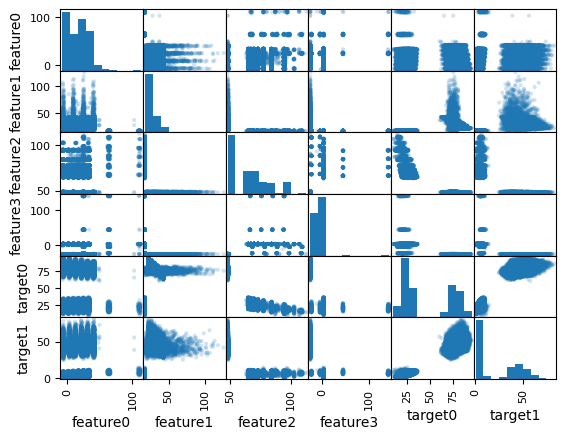

In [6]:
pd.plotting.scatter_matrix(train[[f"feature{n}" for n in range(4)] + ["target0", "target1"]], alpha=0.2)

array([[<Axes: xlabel='feature4', ylabel='feature4'>,
        <Axes: xlabel='feature5', ylabel='feature4'>,
        <Axes: xlabel='feature6', ylabel='feature4'>,
        <Axes: xlabel='feature7', ylabel='feature4'>,
        <Axes: xlabel='target0', ylabel='feature4'>,
        <Axes: xlabel='target1', ylabel='feature4'>],
       [<Axes: xlabel='feature4', ylabel='feature5'>,
        <Axes: xlabel='feature5', ylabel='feature5'>,
        <Axes: xlabel='feature6', ylabel='feature5'>,
        <Axes: xlabel='feature7', ylabel='feature5'>,
        <Axes: xlabel='target0', ylabel='feature5'>,
        <Axes: xlabel='target1', ylabel='feature5'>],
       [<Axes: xlabel='feature4', ylabel='feature6'>,
        <Axes: xlabel='feature5', ylabel='feature6'>,
        <Axes: xlabel='feature6', ylabel='feature6'>,
        <Axes: xlabel='feature7', ylabel='feature6'>,
        <Axes: xlabel='target0', ylabel='feature6'>,
        <Axes: xlabel='target1', ylabel='feature6'>],
       [<Axes: xlabel='feature4

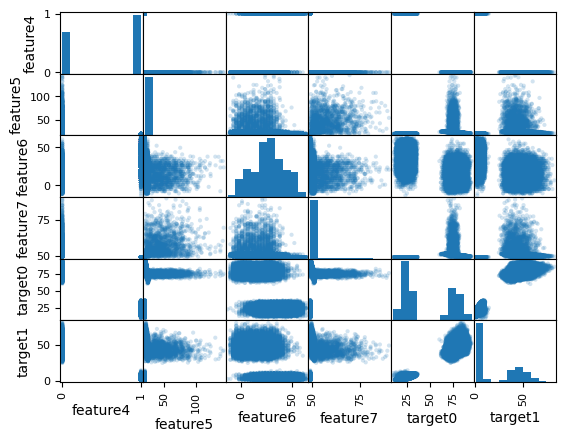

In [7]:
pd.plotting.scatter_matrix(train[[f"feature{n}" for n in range(4,8)] + ["target0", "target1"]], alpha=0.2)

array([[<Axes: xlabel='feature9', ylabel='feature9'>,
        <Axes: xlabel='feature10', ylabel='feature9'>,
        <Axes: xlabel='feature11', ylabel='feature9'>,
        <Axes: xlabel='feature12', ylabel='feature9'>,
        <Axes: xlabel='target0', ylabel='feature9'>,
        <Axes: xlabel='target1', ylabel='feature9'>],
       [<Axes: xlabel='feature9', ylabel='feature10'>,
        <Axes: xlabel='feature10', ylabel='feature10'>,
        <Axes: xlabel='feature11', ylabel='feature10'>,
        <Axes: xlabel='feature12', ylabel='feature10'>,
        <Axes: xlabel='target0', ylabel='feature10'>,
        <Axes: xlabel='target1', ylabel='feature10'>],
       [<Axes: xlabel='feature9', ylabel='feature11'>,
        <Axes: xlabel='feature10', ylabel='feature11'>,
        <Axes: xlabel='feature11', ylabel='feature11'>,
        <Axes: xlabel='feature12', ylabel='feature11'>,
        <Axes: xlabel='target0', ylabel='feature11'>,
        <Axes: xlabel='target1', ylabel='feature11'>],
       [<A

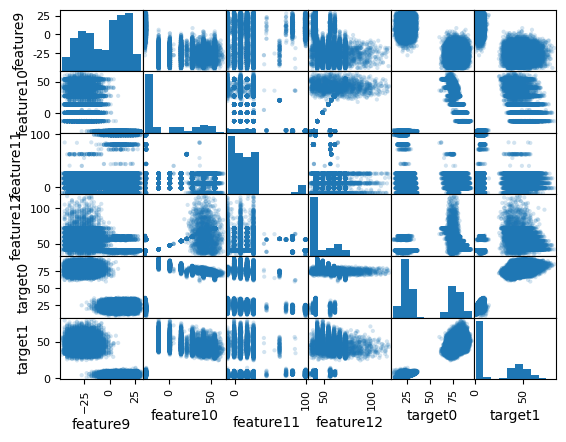

In [8]:
pd.plotting.scatter_matrix(train[[f"feature{n}" for n in range(9,13)] + ["target0", "target1"]], alpha=0.2)

array([[<Axes: xlabel='feature14', ylabel='feature14'>,
        <Axes: xlabel='feature15', ylabel='feature14'>,
        <Axes: xlabel='feature16', ylabel='feature14'>,
        <Axes: xlabel='feature17', ylabel='feature14'>,
        <Axes: xlabel='target0', ylabel='feature14'>,
        <Axes: xlabel='target1', ylabel='feature14'>],
       [<Axes: xlabel='feature14', ylabel='feature15'>,
        <Axes: xlabel='feature15', ylabel='feature15'>,
        <Axes: xlabel='feature16', ylabel='feature15'>,
        <Axes: xlabel='feature17', ylabel='feature15'>,
        <Axes: xlabel='target0', ylabel='feature15'>,
        <Axes: xlabel='target1', ylabel='feature15'>],
       [<Axes: xlabel='feature14', ylabel='feature16'>,
        <Axes: xlabel='feature15', ylabel='feature16'>,
        <Axes: xlabel='feature16', ylabel='feature16'>,
        <Axes: xlabel='feature17', ylabel='feature16'>,
        <Axes: xlabel='target0', ylabel='feature16'>,
        <Axes: xlabel='target1', ylabel='feature16'>],
 

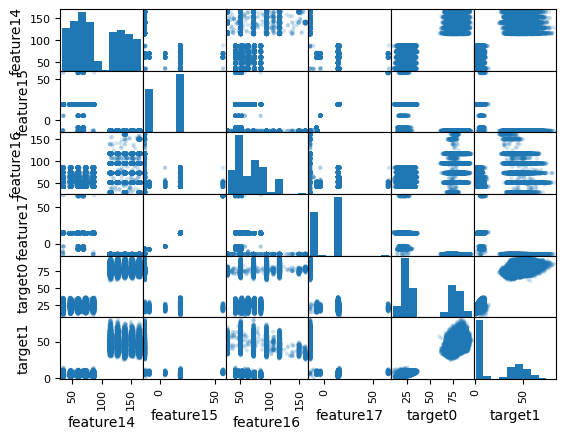

In [9]:
pd.plotting.scatter_matrix(train[[f"feature{n}" for n in range(14,18)] + ["target0", "target1"]], alpha=0.2)

array([[<Axes: xlabel='feature19', ylabel='feature19'>,
        <Axes: xlabel='feature20', ylabel='feature19'>,
        <Axes: xlabel='feature21', ylabel='feature19'>,
        <Axes: xlabel='feature22', ylabel='feature19'>,
        <Axes: xlabel='feature23', ylabel='feature19'>,
        <Axes: xlabel='feature24', ylabel='feature19'>,
        <Axes: xlabel='target0', ylabel='feature19'>,
        <Axes: xlabel='target1', ylabel='feature19'>],
       [<Axes: xlabel='feature19', ylabel='feature20'>,
        <Axes: xlabel='feature20', ylabel='feature20'>,
        <Axes: xlabel='feature21', ylabel='feature20'>,
        <Axes: xlabel='feature22', ylabel='feature20'>,
        <Axes: xlabel='feature23', ylabel='feature20'>,
        <Axes: xlabel='feature24', ylabel='feature20'>,
        <Axes: xlabel='target0', ylabel='feature20'>,
        <Axes: xlabel='target1', ylabel='feature20'>],
       [<Axes: xlabel='feature19', ylabel='feature21'>,
        <Axes: xlabel='feature20', ylabel='feature21'>

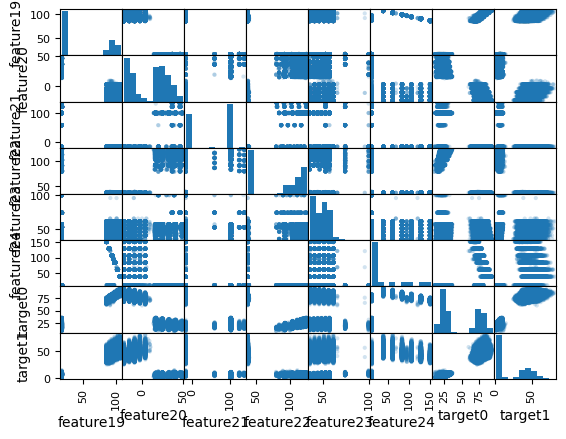

In [10]:
pd.plotting.scatter_matrix(train[[f"feature{n}" for n in range(19,25)] + ["target0", "target1"]], alpha=0.2)

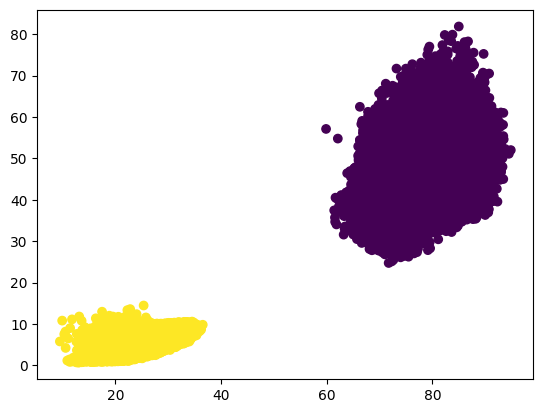

In [11]:
train["cluster"] = (train["feature4"] == 1) * 1
plt.scatter(train["target0"], train["target1"], c=train["cluster"])
plt.show()

<Axes: >

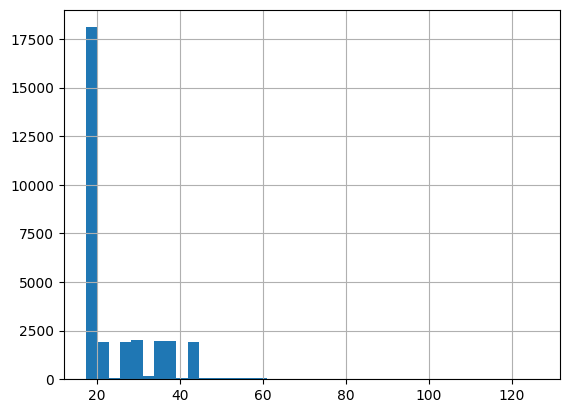

In [23]:
train["feature1"].hist(bins=40)

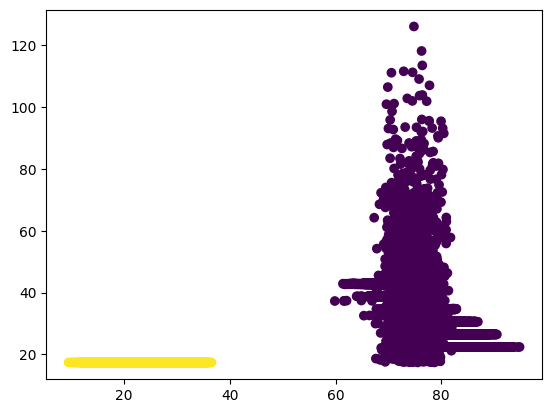

In [20]:
plt.scatter(train["target0"], train["feature1"], c=train["cluster"])
plt.show()

In [14]:
train["cluster"].value_counts()

cluster
1    18007
0    12677
Name: count, dtype: int64